# Investigation of Titanic Data
## Overview

In this notebook I will do some basic investigation of Titanic Dataset, trying to find out how the features of passengers related to her/his survival.

I will go through the following phases to have a basic understading of the question.
* Data Wrangling Phase
* Exploration Phase
* Conclusions Phase




## Read in the data

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
%pylab inline
import seaborn as sns

df = pd.read_csv('input/titanic-data.csv')
df.head()


Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Dictionary

Copied from the "data introduction" of the [kaggle competition](https://www.kaggle.com/c/titanic/data) .

| Variable	| Definition	| Key	|
|-----------|---------------|-------|
| survival	| Survival	    | 0 = No, 1 = Yes	 |
| pclass	| Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd	|
| sex   | 	Sex		|
| Age	| Age | in years		|
| sibsp	| # of siblings / spouses aboard the Titanic	|
| parch	| # of parents / children aboard the Titanic	|	
| ticket | 	Ticket number		|
| fare	| Passenger fare		|
| cabin	| Cabin number		    |
| embarked | 	Port of Embarkation | 	C = Cherbourg, Q = Queenstown, S = Southampton | 


## Variable Notes


pclass: A proxy for socio-economic status (SES)	
1st = Upper	
2nd = Middle	
3rd = Lower	

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5	

sibsp: The dataset defines family relations in this way...	
Sibling = brother, sister, stepbrother, stepsister	
Spouse = husband, wife (mistresses and fiancés were ignored)	

parch: The dataset defines family relations in this way...	
Parent = mother, father	
Child = daughter, son, stepdaughter, stepson	
Some children travelled only with a nanny, therefore parch=0 for them.	



## Data Wrangling Phase

* From previous phase we can see that some data are missing in "Cabin", "Age", "Embarked".


In [56]:
#quote: some ideas to get you started:
#Titanic Data
#What factors made people more likely to survive?


# copy the correlation function in the class video.

def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    correlation = average of (x in standard units) times (y in standard units)
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    x_std = (x - x.mean() ) / x.std(ddof = 0)
    y_std = (y - y.mean() ) / y.std(ddof = 0)
    mean = (x_std * y_std).mean() 
    return mean


In [57]:

# and try to get the correlations 
pid = df['PassengerId']
survived = df['Survived']
pclass = df['Pclass']
name = df['Name']
sex = df['Sex']
age = df['Age']
sibsp = df['SibSp']
parch = df['Parch']
ticket = df['Ticket']
fare = df['Fare']
cabin = df['Cabin']
embarked = df['Embarked']

print('correlation(survived, pid):', correlation(survived, pid) )
print('correlation(survived, pclass): ', correlation(survived, pclass) )
print('correlation(survived, age): ', correlation(survived, age) )
print('correlation(survived, sibsp):', correlation(survived, sibsp) )
print('correlation(survived, parch):', correlation(survived, parch) )
print('correlation(survived, fare):', correlation(survived, fare) )
#print('correlation(survived, sex):', correlation(survived, sex) )
#print('correlation(survived, name):', correlation(survived, name) )
#print('correlation(survived, embarked):', correlation(survived, embarked) )
# Error. Now I know that I only correlate numerical datas.



correlation(survived, pid): -0.005006660767066522
correlation(survived, pclass):  -0.33848103596101325
correlation(survived, age):  -0.077982678413863
correlation(survived, sibsp): -0.03532249888573573
correlation(survived, parch): 0.08162940708348272
correlation(survived, fare): 0.2573065223849616


* Now I know that I only correlate numerical datas.
* So now Pclass, -0.33. Fare, 0.25 . Parch 0.08. Maybe I should investigate these more.
* 'Sex' is something I wondered about, but we cannot correlate strings 'male' 'female', so we need to transform it to numerical.


In [58]:
def transform_sex(df_sex):
    if df_sex == 'male':
        return 1
    elif (df_sex == 'female'):
        return 0

df['Male'] = df['Sex'].apply(transform_sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [59]:
male = df['Male']
print('correlation(survived, male):', correlation(survived, male) )

correlation(survived, male): -0.5433513806577471


In [60]:
print('age fare corr:', correlation(age, fare) )
# This could lead to anothre interesting question: Does older people pay more?
# But I'm not going to do this for now.


age fare corr: 0.1022879397576524


(891,)
m =  0.382713062346


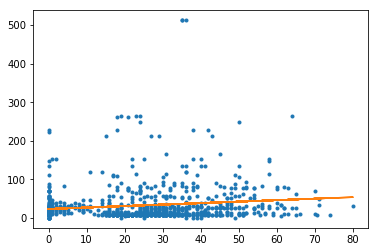

In [61]:
'''
m, b = np.polyfit(fare, fare, 1)
plt.plot(fare, m * fare + b, '-')

m, b = np.polyfit(age, fare, 1)
plt.plot(age, m * age + b, '-')
'''
new_age = np.nan_to_num(age)
print(new_age.shape)


# https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
m, b = np.polyfit(new_age, fare, 1)
plt.plot(new_age, fare, '.')
plt.plot(new_age, m * new_age + b, '-')
print('m = ', m)


(714,)
m =  0.0263707628788


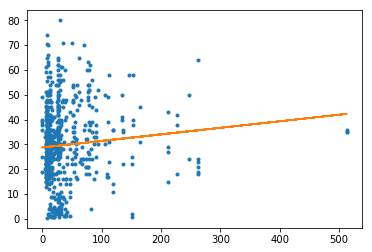

In [62]:
# https://stackoverflow.com/questions/14016247/python-find-integer-index-of-rows-with-nan-in-pandas
age_df = df[~np.isnan(df['Age']) ]
new_age = age_df['Age']
new_fare = age_df['Fare']

m, b = np.polyfit(new_fare, new_age,  1)
plt.plot(new_fare, new_age, '.')
plt.plot(new_fare, m * new_fare + b, '-')

print(new_age.shape)
print('m = ', m)


## Exploration Phase

### Single-variable (1d) explorations 

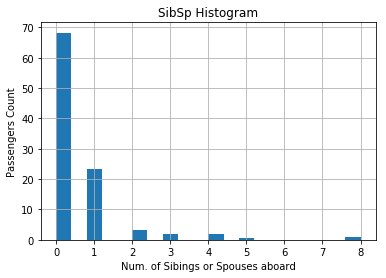

In [163]:
# https://stackoverflow.com/a/34756965/720276
df['SibSp'].hist(bins=20, weights=np.ones_like(df['SibSp']) * 100. / len(df['SibSp']))
plt.xlabel("Num. of Sibings or Spouses aboard")
plt.ylabel("Passengers Count")
plt.title("SibSp. Histogram")


* From this histogram we can see most people(more than 65%) are without siblings or spouses aboard. 
* About 20% has 1 siblings or spouse aboard.


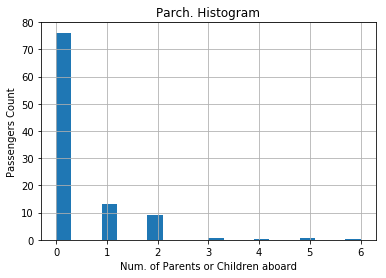

In [164]:
df['Parch'].hist(bins=20, weights=np.ones_like(df['Parch']) * 100. / len(df['Parch']))
plt.xlabel("Num. of Parents or Children aboard")
plt.ylabel("Passengers Count")
plt.title("Parch. Histogram")


* From this histogram we can see most people(more than 75%) are without parents or children aboard. 
* About 12% has 1 parent of child aboard.
* About 9% has 2 parents of children aboard.


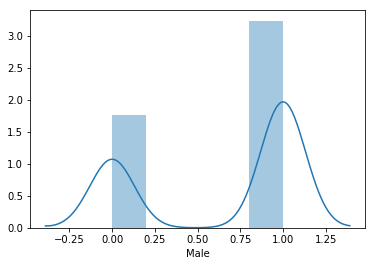

In [121]:
sns.distplot(df['Male'], norm_hist=True)

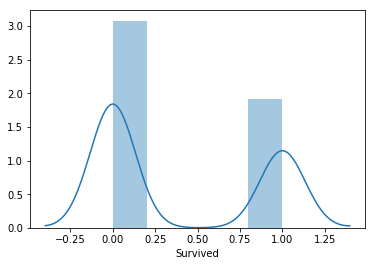

In [123]:
sns.distplot(df['Survived'], norm_hist=True)

(array([ 608.,  209.,   28.,   16.,    0.,   18.,    5.,    0.,    0.,    7.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 10 Patch objects>)

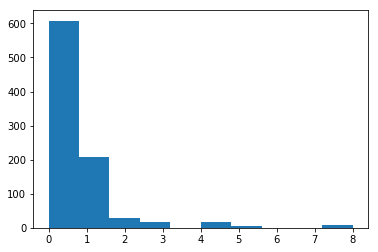

In [149]:
plt.hist(df['SibSp'])


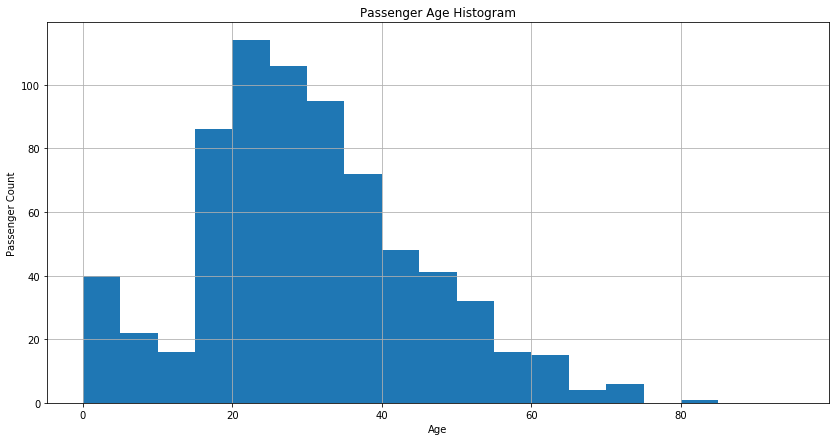

In [63]:
age.hist(bins = np.arange(0, 100, 5), figsize = (14, 7))
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.title("Passenger Age Histogram")



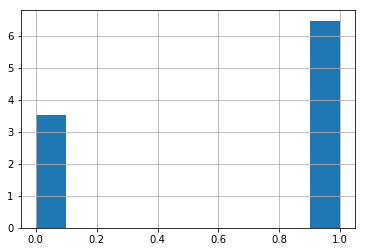

In [114]:
df['Male'].hist(normed = True)

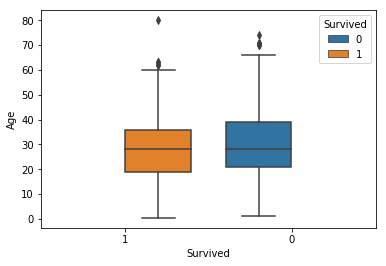

In [91]:
sns.boxplot(x="Survived", y="Age", hue="Survived", data=new_df, order=[1, 0] ) 


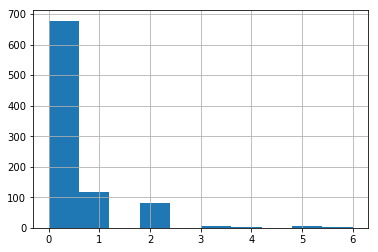

In [92]:
df['Parch'].hist()

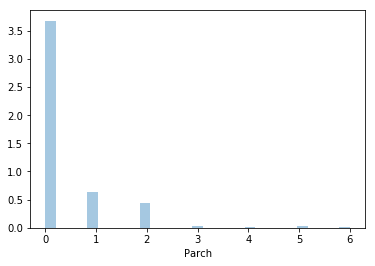

In [111]:
sns.distplot( df['Parch'], kde = False, norm_hist= True)

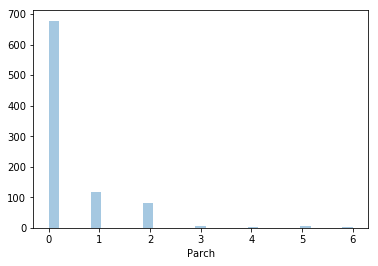

In [109]:
sns.distplot( df['Parch'], kde = False )

In [101]:
#sns.distplot( df['SibSp'], rug = False )

In [64]:
# new_df = df[['Age','Survived']].dropna()

# fig = plt.figure()
# ax = fig.add_subplot(111)

# x1 = new_df[new_df['Survived'] == 0]['Age']
# x2 = new_df[new_df['Survived'] == 1]['Age']

# labels = ['Survived = 0','Survived = 1']

# #ax.boxplot([x1,x2], labels = labels)
# ax.boxplot([x1,x2], labels = labels)

# ax.set_ylabel('Age')
# ax.set_title('Box Plot Survived')
# plt.legend()
# plt.show()

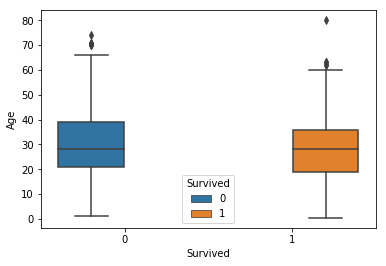

In [65]:
sns.boxplot(x="Survived", y="Age", hue="Survived", data=new_df, order=[0,1] ) 



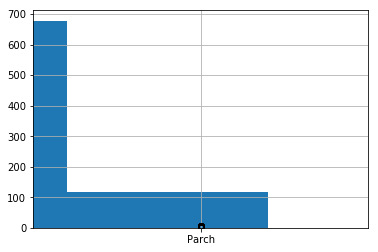

In [66]:
df['Parch'].hist()

df['Parch'].to_frame().boxplot()


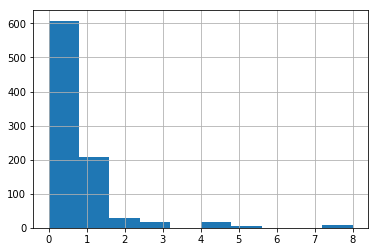

In [67]:
df['SibSp'].hist()


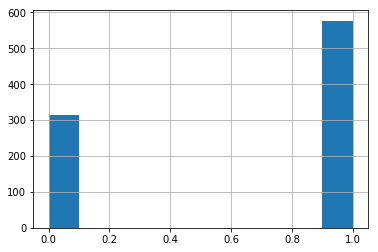

In [68]:
df['Male'].hist()


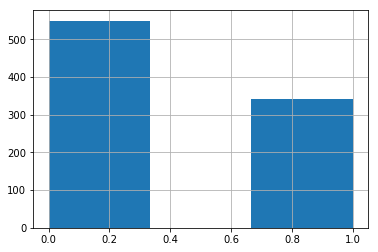

In [69]:
df['Survived'].hist(bins = 3)


In [85]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


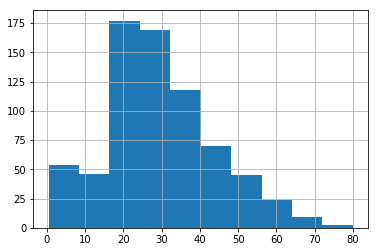

In [70]:
df['Age'].hist()



In [71]:
# to split survived and deceased.
def split_survived(data, attr):
    survived = data[data['Survived'] == 1][attr]
    deceased = data[data['Survived'] == 0][attr]
    return survived, deceased


In [72]:
survived_class, deceased_class = split_survived(new_df, 'Pclass')

print( survived_class.describe() )
print( deceased_class.describe() )

survived_class.hist()


KeyError: 'Pclass'

In [ ]:
interrupt

### Multiple-variable (2d) explorations

In [74]:
new_df = df

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2d5ee1f28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fd2d5ed45f8>], dtype=object)

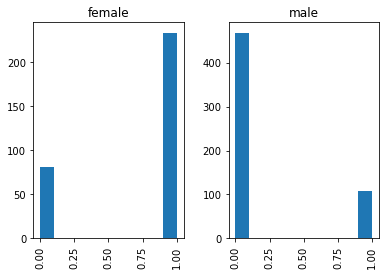

In [115]:
new_df['Survived'].hist(by=new_df['Sex'])


In [ ]:

sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=df);


In [ ]:
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data= df[ 'S' == df['Embarked'] ]);


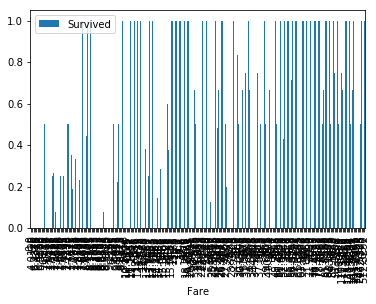

In [76]:
fare_survived = new_df[['Fare', 'Survived']].groupby(['Fare'],as_index=False)
#print( fare_survived.head() )
fare_survived = new_df[['Fare', 'Survived']].groupby(['Fare'],as_index=True).mean()
#print( fare_survived ) 
fare_survived.plot.bar()


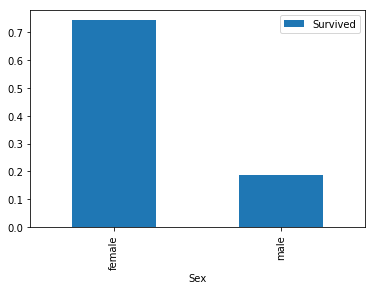

In [77]:
sex_survived = new_df[['Sex', 'Survived']].groupby(['Sex'],as_index=False)
#print( sex_survived.head() )
sex_survived = new_df[['Sex', 'Survived']].groupby(['Sex'],as_index=True).mean()
#print( sex_survived ) 
sex_survived.plot.bar()


In [ ]:
SibSp_survived = new_df[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False)
#to verify I'm doing correctly.
#print( SibSp_survived.head() )
SibSp_survived = new_df[['SibSp', 'Survived']].groupby(['SibSp'],as_index=True).mean()
print( SibSp_survived ) 
SibSp_survived.plot.bar()


In [ ]:
def hasSib(sib):
    if sib > 0:
        return 1
    elif (sib == 0):
        return 0

new_df['hasSib'] = new_df['SibSp'].apply(hasSib)
#to verify I'm doing correctly.
#new_df[['SibSp', 'hasSib'] ]

In [ ]:
hasSib_survived = new_df[['hasSib', 'Survived']].groupby(['hasSib'],as_index=False)
print( hasSib_survived.head() )
hasSib_survived = new_df[['hasSib', 'Survived']].groupby(['hasSib'],as_index=True).mean()
print( hasSib_survived ) 
hasSib_survived.plot.bar()


In [ ]:
parch_survived = new_df[['Parch', 'Survived']].groupby(['Parch'],as_index=False)
#to verify I'm doing correctly.
#print( parch_survived.head() )
parch_survived = new_df[['Parch', 'Survived']].groupby(['Parch'],as_index=True).mean()
print( parch_survived ) 
parch_survived.plot.bar()


In [ ]:
def hasParentChild(parch):
    if parch > 0:
        return 1
    elif (parch == 0):
        return 0

new_df['hasParch'] = new_df['Parch'].apply(hasParentChild)
#to verify I'm doing correctly.
#new_df[['Parch', 'hasParch'] ]

In [ ]:
hasParch = new_df[['hasParch', 'Survived']].groupby(['hasParch'],as_index=False)
print( hasParch.head() ) 

hasParch = new_df[['hasParch', 'Survived']].groupby(['hasParch'],as_index = True ).mean()
print( hasParch )
hasParch.plot.bar()


In [ ]:
embark_survived = new_df[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False)
print( embark_survived.head() ) 

embark_survived = new_df[['Embarked', 'Survived']].groupby(['Embarked'],as_index = True ).mean()
print( embark_survived )
embark_survived.plot.bar()


## Conclusions Phase



From previous phase we can see:
* It seems that female passengers have a significant survival rate of 74%, while male passengers only 18%.
* Passengers having siblings or parent/children have a slightly higher survival rate.
